In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix # confusion matrix
#from sklearn.model_selection import learning_curve

# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("model_dataset.csv")

In [3]:
model_data = df.copy()

In [4]:
model_data.drop("Unnamed: 0", inplace=True, axis=1)

In [5]:
model_data

,charges,charges_log,smoker_log,age_log,children_log,bmi_log
0,16884.92,9.734235,0.693147,2.995732,0.000000,3.363842
1,1725.55,7.453880,0.000000,2.944439,0.693147,3.548755
2,4449.46,8.400763,0.000000,3.367296,1.386294,3.526361
3,21984.47,9.998137,0.000000,3.526361,0.000000,3.165475
4,3866.86,8.260457,0.000000,3.496508,0.000000,3.397189
...,...,...,...,...,...,...
1321,10600.55,9.268755,0.000000,3.931826,1.386294,3.464798
1322,2205.98,7.699380,0.000000,2.944439,0.000000,3.494080
1323,1629.83,7.396844,0.000000,2.944439,0.000000,3.633631
1324,2007.94,7.605362,0.000000,3.091042,0.000000,3.288402


In [6]:
X = model_data[['smoker_log', 'age_log', 'children_log', 'bmi_log']]
y = model_data[['charges']]

In [7]:
X

,smoker_log,age_log,children_log,bmi_log
0,0.693147,2.995732,0.000000,3.363842
1,0.000000,2.944439,0.693147,3.548755
2,0.000000,3.367296,1.386294,3.526361
3,0.000000,3.526361,0.000000,3.165475
4,0.000000,3.496508,0.000000,3.397189
...,...,...,...,...
1321,0.000000,3.931826,1.386294,3.464798
1322,0.000000,2.944439,0.000000,3.494080
1323,0.000000,2.944439,0.000000,3.633631
1324,0.000000,3.091042,0.000000,3.288402


In [8]:
X_copy = X.copy()

In [9]:
X_copy 

,smoker_log,age_log,children_log,bmi_log
0,0.693147,2.995732,0.000000,3.363842
1,0.000000,2.944439,0.693147,3.548755
2,0.000000,3.367296,1.386294,3.526361
3,0.000000,3.526361,0.000000,3.165475
4,0.000000,3.496508,0.000000,3.397189
...,...,...,...,...
1321,0.000000,3.931826,1.386294,3.464798
1322,0.000000,2.944439,0.000000,3.494080
1323,0.000000,2.944439,0.000000,3.633631
1324,0.000000,3.091042,0.000000,3.288402


In [10]:
y

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1321,10600.55
1322,2205.98
1323,1629.83
1324,2007.94


In [11]:
y_log = model_data[['charges_log']]

In [12]:
y_log

,charges_log
0,9.734235
1,7.453880
2,8.400763
3,9.998137
4,8.260457
...,...
1321,9.268755
1322,7.699380
1323,7.396844
1324,7.605362


In [13]:
X.shape

(1326, 4)

In [14]:
y.shape

(1326, 1)

## Feature Standardization

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

In [16]:
# Fit the input data (X)
scaler.fit(X_copy)

StandardScaler()

In [17]:
# Scale with the method 'transform()'
x_scaled = scaler.transform(X_copy)

In [18]:
x_scaled

array([[ 1.99623706, -1.66514591, -1.04373951, -0.3602442 ],
       [-0.50094251, -1.80057372,  0.19708798,  0.59626764],
       [-0.50094251, -0.68412022,  1.43791548,  0.48042674],
       ...,
       [-0.50094251, -1.80057372, -1.04373951,  1.03531074],
       [-0.50094251, -1.41350192, -1.04373951, -0.75047548],
       [ 1.99623706,  1.32205376, -1.04373951, -0.15495609]],
      shape=(1326, 4))

## Feature Selection

In [19]:
from sklearn.feature_selection import f_regression

f_statistic, p_values = f_regression(x_scaled,y_log)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
f_statistic

array([1012.26163413,  541.9047854 ,   42.78527414,   24.67512678])

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Create selector instance
selector = SelectKBest(mutual_info_regression, k=3)

# Fit the selector to the data
selector.fit(x_scaled, y_log)

# Transform the data (get the selected features)
X_new = selector.transform(x_scaled)

# Access feature scores
feature_scores = selector.scores_

# Check the selected features
selected_indices = selector.get_support(indices=True)


/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
selected_indices

array([0, 1, 2])

## Checking OLS Assumption

In [23]:
x_scaled_ols = pd.DataFrame(x_scaled[ : , :3], columns= ["smoker", "age", "children"])

In [24]:
ols_data = pd.concat([x_scaled_ols, y_log], axis = 1)

In [25]:
ols_data_reorder = ols_data[["charges_log", "smoker", "age", "children"]]

ols_data_reorder

,charges_log,smoker,age,children
0,9.734235,1.996237,-1.665146,-1.043740
1,7.453880,-0.500943,-1.800574,0.197088
2,8.400763,-0.500943,-0.684120,1.437915
3,9.998137,-0.500943,-0.264148,-1.043740
4,8.260457,-0.500943,-0.342967,-1.043740
...,...,...,...,...
1321,9.268755,-0.500943,0.806387,1.437915
1322,7.699380,-0.500943,-1.800574,-1.043740
1323,7.396844,-0.500943,-1.800574,-1.043740
1324,7.605362,-0.500943,-1.413502,-1.043740


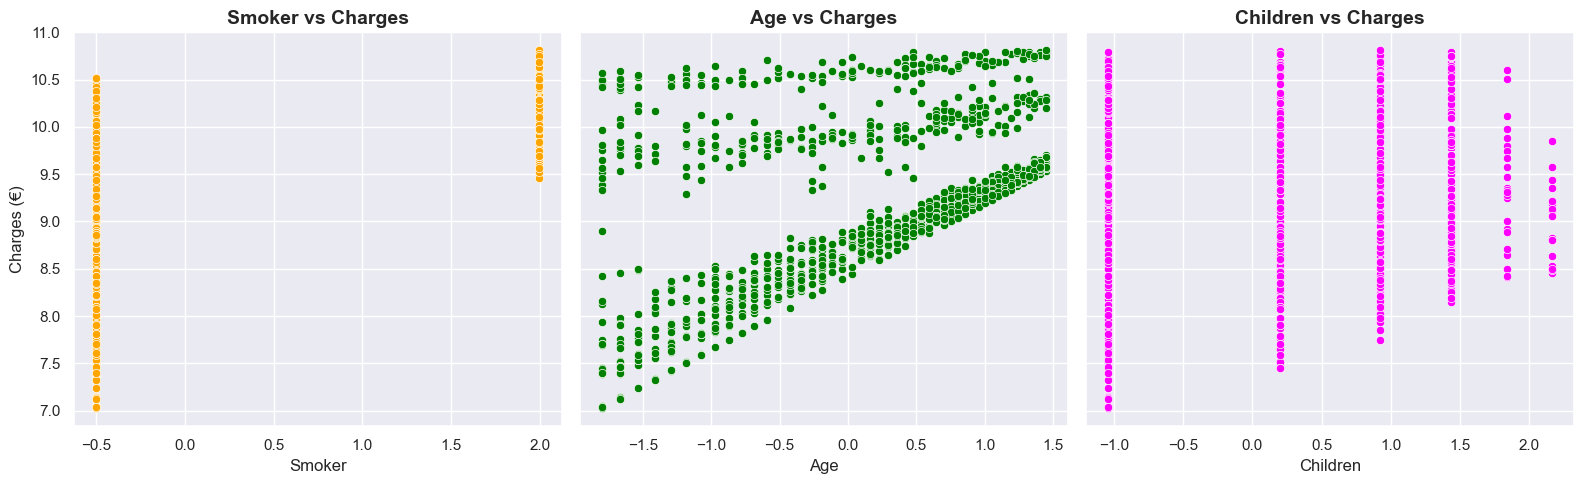

In [26]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize = (16, 5), sharey=True) 

# Scatter plot: age vs bmi
sns.scatterplot(data=ols_data_reorder, x='smoker', y='charges_log', ax=axes[0], color='orange')
axes[0].set_title('Smoker vs Charges', fontsize=14, weight='bold')
axes[0].set_xlabel('Smoker', fontsize=12, weight='normal')
axes[0].set_ylabel('Charges (€)', fontsize=12, weight='normal')

# Scatter plot: children vs bmi
sns.scatterplot(data=ols_data_reorder, x='age', y='charges_log', ax=axes[1], color='green')
axes[1].set_title('Age vs Charges', fontsize=14, weight='bold')
axes[1].set_xlabel('Age', fontsize=12, weight='normal')

# Scatter plot: children vs age_log
sns.scatterplot(data=ols_data_reorder, x='children', y='charges_log', ax=axes[2], color='magenta')
axes[2].set_title('Children vs Charges', fontsize=14, weight='bold')
axes[2].set_xlabel('Children', fontsize=12, weight='normal')

# Adjust layout
plt.tight_layout()
plt.show()

## Checking for multicollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = ols_data_reorder[['smoker','age','children']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [28]:
vif

,VIF,Features
0,1.000993,smoker
1,1.011490,age
2,1.011120,children


## Linear Regression Models

### KNN (smoker, age, children)

In [29]:
y_model = y_log.values

In [30]:
y_model

array([[ 9.73423542],
       [ 7.45388048],
       [ 8.40076274],
       ...,
       [ 7.39684437],
       [ 7.6053625 ],
       [10.27994806]], shape=(1326, 1))

In [31]:
X_model = x_scaled[:, 0 : 3]

In [32]:
X_model.shape

(1326, 3)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

print("Train set", x_train.shape)
print("Test set", x_test.shape)

Train set (1060, 3)
Test set (266, 3)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors' : np.arange(1, 50),
              'weights': ['uniform', 'distance'],
              'metric': ['sokalmichener', 'cityblock', 'nan_euclidean', 'chebyshev',
                         'euclidean', 'manhattan', 'cosine'],
              'p': [1, 2, 3]
              }

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, error_score='raise')

grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsRegressor(),
             param_grid={'metric': ['sokalmichener', 'cityblock',
                                    'nan_euclidean', 'chebyshev', 'euclidean',
                                    'manhattan', 'cosine'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [35]:
grid.best_score_

np.float64(0.8084129916374913)

In [36]:
grid.best_params_

{'metric': 'chebyshev',
 'n_neighbors': np.int64(22),
 'p': 1,
 'weights': 'uniform'}

In [37]:
knn_model_1 = grid.best_estimator_

In [38]:
knn_model_1.score(x_test,y_test)

0.7450678594336817

In [39]:
y_hat_test = knn_model_1.predict(x_test)

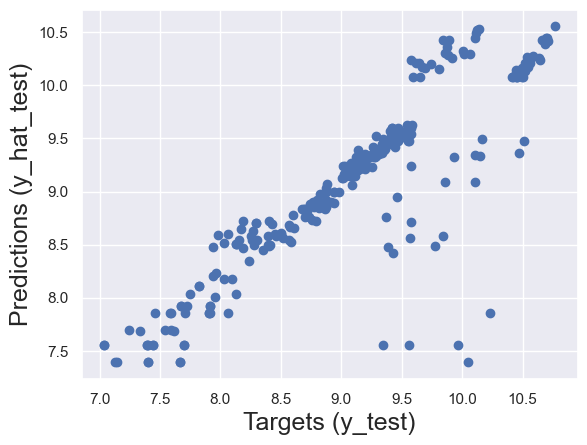

In [40]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [41]:
res_data = pd.DataFrame(y_hat_test, columns=['residual'])

Text(12.569444444444445, 0.5, 'Frequency')

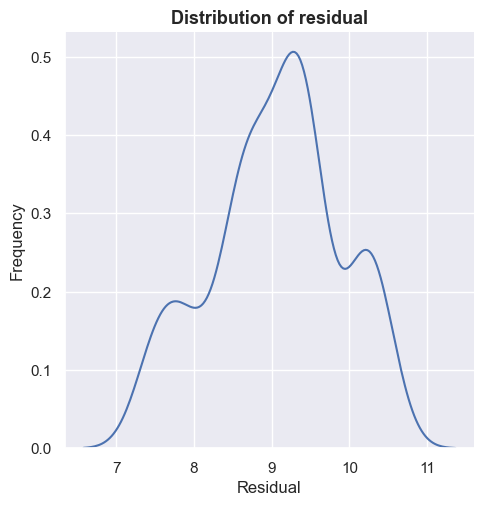

In [42]:
sns.displot(res_data, x = 'residual', kind='kde')
plt.title("Distribution of residual", fontsize= 13, weight = "bold")
plt.xlabel("Residual", weight = 10)
plt.ylabel("Frequency", weight = 10)

Text(12.569444444444445, 0.5, 'Frequency')

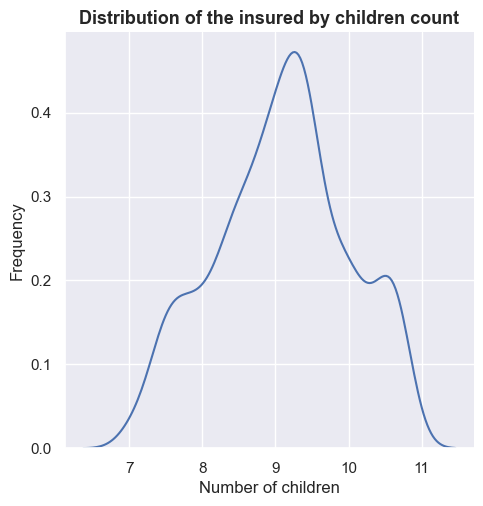

In [43]:
sns.displot(df, x = 'charges_log', kind='kde')
plt.title("Distribution of the insured by children count", fontsize= 13, weight = "bold")
plt.xlabel("Number of children", weight = 10)
plt.ylabel("Frequency", weight = 10)

### KNN (smoker & age)

In [44]:
X_model_2 = x_scaled[:, 0 : 2]
y_model

array([[ 9.73423542],
       [ 7.45388048],
       [ 8.40076274],
       ...,
       [ 7.39684437],
       [ 7.6053625 ],
       [10.27994806]], shape=(1326, 1))

In [45]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_model, test_size=0.2, random_state=42)

print("Train set", x_train_2.shape)
print("Test set", x_test_2.shape)

Train set (1060, 2)
Test set (266, 2)


In [46]:
grid_2 = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, error_score='raise')

grid_2.fit(x_train_2, y_train_2)

GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsRegressor(),
             param_grid={'metric': ['sokalmichener', 'cityblock',
                                    'nan_euclidean', 'chebyshev', 'euclidean',
                                    'manhattan', 'cosine'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [47]:
grid_2.best_score_

np.float64(0.7907256801788103)

In [48]:
grid_2.best_params_

{'metric': 'cosine', 'n_neighbors': np.int64(44), 'p': 1, 'weights': 'uniform'}

In [49]:
knn_model_2 = grid_2.best_estimator_

knn_model_2.score(x_test_2, y_test_2)

0.7161964982202902

In [50]:
y_hat_2_test = knn_model_2.predict(x_test_2)

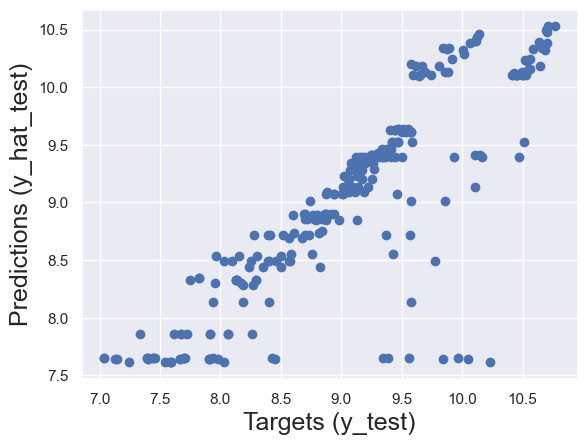

In [51]:
plt.scatter(y_test_2, y_hat_2_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

#### Support Vector Regression

In [52]:
from sklearn.svm import SVR, LinearSVR

svr_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [2, 3],
              'gamma':['scale', 'auto'],
              'C': np.arange(1.0, 5.0),
              'epsilon': np.arange(0.1, 0.9)
             }

svr_grid = GridSearchCV(SVR(), svr_param_grid, cv=5, error_score='raise')

svr_grid.fit(x_train, y_train)


/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

GridSearchCV(cv=5, error_score='raise', estimator=SVR(),
             param_grid={'C': array([1., 2., 3., 4.]), 'degree': [2, 3],
                         'epsilon': array([0.1]), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [53]:
svr_grid.best_score_

np.float64(0.7962238092173808)

In [54]:
svr_grid.best_params_

{'C': np.float64(1.0),
 'degree': 2,
 'epsilon': np.float64(0.1),
 'gamma': 'auto',
 'kernel': 'rbf'}

In [55]:
svr_model = svr_grid.best_estimator_

In [56]:
svr_model.score(x_test, y_test)

0.7313321681182616

#### SVR (smoker and age)

In [57]:
svr_grid_2 = GridSearchCV(SVR(), svr_param_grid, cv=5, error_score='raise')

svr_grid_2.fit(x_train_2, y_train_2)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

GridSearchCV(cv=5, error_score='raise', estimator=SVR(),
             param_grid={'C': array([1., 2., 3., 4.]), 'degree': [2, 3],
                         'epsilon': array([0.1]), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [58]:
svr_grid_2.best_score_

np.float64(0.7737978440619196)

In [59]:
svr_grid_2.best_params_

{'C': np.float64(2.0),
 'degree': 2,
 'epsilon': np.float64(0.1),
 'gamma': 'scale',
 'kernel': 'rbf'}

In [60]:
svr_model_2 = svr_grid_2.best_estimator_

In [61]:
svr_model_2.score(x_test_2, y_test_2)

0.6868019946024562

#### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_hat_lin = linear_model.predict(x_train)

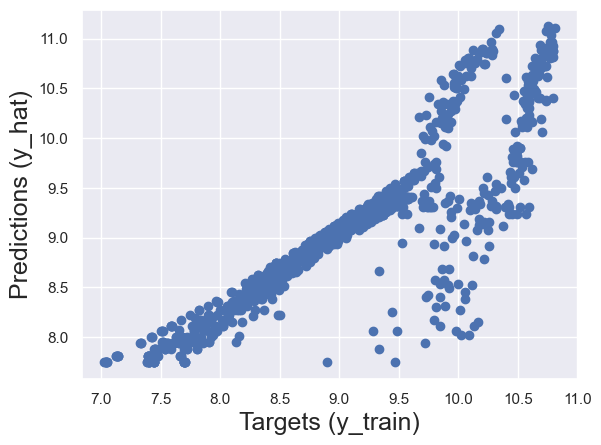

In [64]:
plt.scatter(y_train, y_hat_lin)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

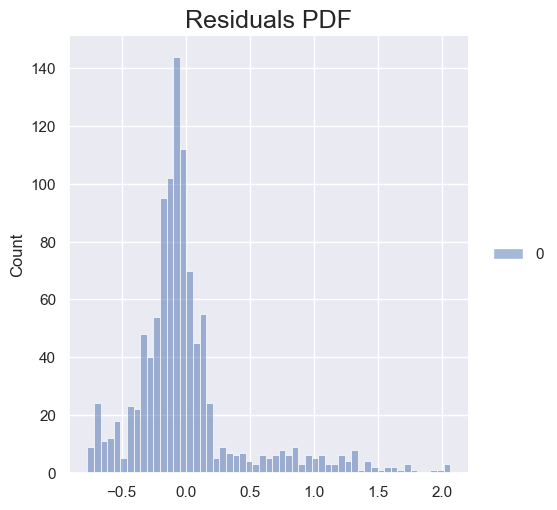

In [65]:
sns.displot(y_train - y_hat_lin)
plt.title("Residuals PDF", size=18)

In [66]:
linear_model.score(x_train,y_train)

0.7699642105417431

In [67]:
linear_model.intercept_

array([9.07792821])

In [68]:
linear_model.coef_

array([[0.59720484, 0.51189865, 0.1065734 ]])

Text(0, 0.5, 'Predictions (y_hat_test)')

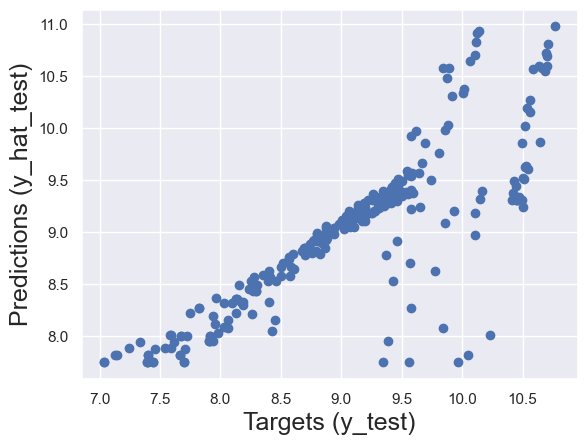

In [69]:
predictions = linear_model.predict(x_test)

plt.scatter(y_test, predictions)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)

In [70]:
linear_model.score(x_test,y_test)

0.6829736450968206

### Multi-Layer Perceptron Regressor

In [72]:
from sklearn.neural_network import MLPRegressor


MLP_param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver':['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
             }

mlp_grid = GridSearchCV(MLPRegressor(), MLP_param_grid, cv=5, error_score='raise')

mlp_grid.fit(x_train, y_train)

print("Best CV score:", mlp_grid.best_score_)
print("Best parameters:", mlp_grid.best_params_)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed whe

Best CV score: 0.8113784409712318
Best parameters: {'activation': 'logistic', 'learning_rate': 'invscaling', 'solver': 'lbfgs'}


/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'predicted')

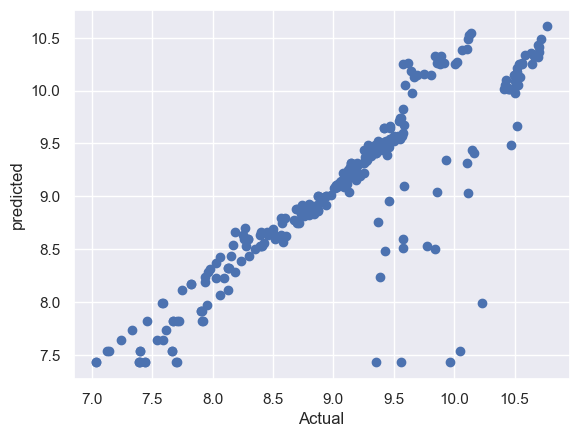

In [80]:
pred = mlp_grid.predict(x_test)

plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("predicted")

In [79]:
mlp_grid.score(x_test, y_test)

0.748597452271907

### ElasticNet

In [89]:
from sklearn.linear_model import Ridge

rr_param_grid = {'alpha': [1.0, 2.0, 3.0],
              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
             }

rr_grid = GridSearchCV(Ridge(), rr_param_grid, cv=5, error_score='raise')

rr_grid.fit(x_train, y_train)

print("Best CV score:", rr_grid.best_score_)
print("Best parameters:", rr_grid.best_params_)

Best CV score: 0.7632942611662497
Best parameters: {'alpha': 3.0, 'solver': 'svd'}


In [90]:
rr_grid.score(x_test, y_test)

0.6830497284132638

### Ensemble model

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

ensemble = VotingRegressor(estimators=[
    ('knn', KNeighborsRegressor(n_neighbors=22, metric='chebyshev', p=1, weights='uniform')),
    ('gbr', GradientBoostingRegressor()),
    ('rfr', RandomForestRegressor(n_estimators=100, random_state=42))
])
ensemble.fit(x_train, y_train)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/ensemble/_voting.py:698: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('knn',
                             KNeighborsRegressor(metric='chebyshev',
                                                 n_neighbors=22, p=1)),
                            ('gbr', GradientBoostingRegressor()),
                            ('rfr', RandomForestRegressor(random_state=42))])

In [ ]:
ensemble.score(x_test,y_test)

0.7452061674958124

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [132]:
rf_model.score(x_test, y_test)

0.7140279914076412